# manage utils dir

In [1]:
print(__doc__)

from itertools import islice;
from pprint import pprint;
from sklearn import preprocessing;

import copy; import os;
import sys; import shutil;
import time;

import numpy as np; import pandas as pd;

%matplotlib inline
# Matplotlib pyplot provides plotting API
import matplotlib as mpl
from matplotlib import pyplot as plt
import chart_studio.plotly.plotly as py
import seaborn as sns; sns.set()

Automatically created module for IPython interactive environment


In [2]:
def dir_traversal_by_os_walk(root_dir_path: str, verbose: int = 0) -> list:
    resources_list: list = [(root, dirs, files) for root, dirs, files, in os.walk(root_dir_path)]  
    
    if verbose == 1:
        print("List of all sub-directories and files:")  
        for (root, dirs, files)  in resources_list: 
            print('Root:', root)
            print('Directories:', dirs)
            print('Files:', files)
    return resources_list

def get_df_from_list_of_os_walk_numeric(resources_list: list, columns="root,dirs,files", verbose: int = 1) -> pd.DataFrame:
    if type(columns) is not list:
        columns = "root,dirs,files".split(",")
    stats_list: list = list(map(lambda record: (record[0], len(record[1]), len(record[2])), resources_list))
    df: pd.DataFrame = pd.DataFrame(data=stats_list, columns=columns)
    return df

def get_df_from_list_of_os_walk(resources_list: list, columns="root,dirs,files", verbose: int = 1) -> pd.DataFrame:
    data: list = list()
    if type(columns) is not list:
        columns = "root,dirs,files".split(",")
    for _, (root, dirs, files) in enumerate(resources_list):
        for _, a_file in enumerate(files):
            a_record: list = [root, os.path.dirname(a_file), os.path.basename(a_file)]
            data.append(a_record)
            pass
        pass
    df: pd.DataFrame = pd.DataFrame(data=data, columns=columns)
    return df

In [3]:
ROOT_DIR_PATH = "."

resources_list = dir_traversal_by_os_walk(root_dir_path=ROOT_DIR_PATH, verbose=0)
df = get_df_from_list_of_os_walk_numeric(resources_list=resources_list)
assert df is not None, "df is None"

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   root    140 non-null    object
 1   dirs    140 non-null    int64 
 2   files   140 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ KB


In [5]:
# print(df.head(df.shape[0]))
df.head(5)

,root,dirs,files
0,.,6,14
1,.\.ipynb_checkpoints,0,13
2,.\figures,8,1
3,.\figures\.ipynb_checkpoints,0,0
4,.\figures\DecisionTreeClassifier,0,0


In [6]:
df[["dirs", "files"]].agg(['sum', 'max', 'min', 'mean', 'std'])

,dirs,files
sum,139.000000,259.000000
max,8.000000,14.000000
min,0.000000,0.000000
mean,0.992857,1.850000
std,1.871776,2.259831


In [7]:
df[["dirs", "files"]].describe(include='all')

,dirs,files
count,140.000000,140.000000
mean,0.992857,1.850000
std,1.871776,2.259831
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2.000000
75%,1.000000,2.000000
max,8.000000,14.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A97F96E1C8>,
      dtype=object)

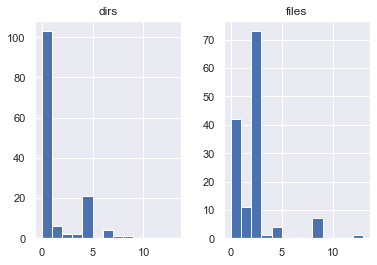

In [8]:
res_stats = df[["dirs", "files"]].describe(include='all')
loc_max: int = res_stats.index.get_loc('max')
loc_min: int = res_stats.index.get_loc('min')
max_val = int(max(res_stats.loc[res_stats.index[loc_max]]))
min_val = int(min(res_stats.loc[res_stats.index[loc_min]]))
bins = range(min_val, max_val)
df[["dirs", "files"]].hist(bins=bins)

In [9]:
type(res_stats.index)

pandas.core.indexes.base.Index

In [10]:
def file2ext(file_name: str) ->str:
    tmp_res: str = os.path.basename(file_name)
    filename, file_extension = os.path.splitext(tmp_res)
    if len(file_extension) == 0: return "-"
    return file_extension
df = get_df_from_list_of_os_walk(resources_list=resources_list, columns="root,dirs,files", verbose=0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   root    259 non-null    object
 1   dirs    259 non-null    object
 2   files   259 non-null    object
dtypes: object(3)
memory usage: 6.2+ KB


In [12]:
# type(df[["files"]].applymap(file2ext))
pd.unique(df[["files"]].applymap(file2ext)["files"].values)

array(['-', '.ipynb', '.png', '.jpg', '.py', '.json', '.pyc'],
      dtype=object)

In [13]:
# type(df[["files"]].applymap(file2ext)["files"].value_counts())
df[["files"]].applymap(file2ext)["files"].value_counts().to_frame().T

,.png,.py,.ipynb,.pyc,.json,.jpg,-
files,156,49,40,8,4,1,1


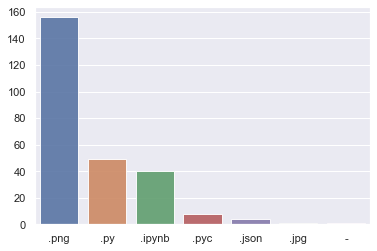

In [18]:
# df[["files"]].applymap(file2ext)["files"].value_counts().to_frame().hist()
ext_df: pd.DataFrame = df[["files"]].applymap(file2ext)
predictor = ext_df["files"].value_counts()
sns.barplot(predictor.index, predictor.values, alpha=0.9)

In [19]:
type(predictor)

pandas.core.series.Series

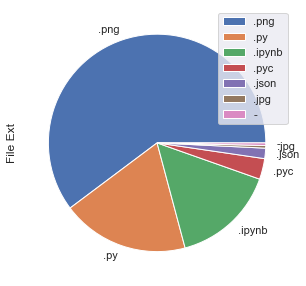

In [20]:
tmp_df = pd.DataFrame(data=predictor.values, columns=["File Ext"], index=predictor.index)
tmp_df.plot.pie(y='File Ext', figsize=(5, 5))

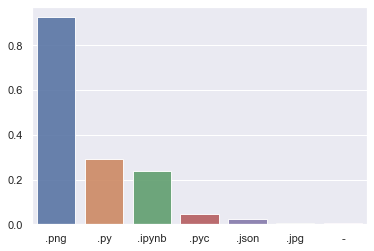

In [15]:
pred_rescaled = preprocessing.normalize(predictor.values[:,np.newaxis], axis=0).ravel()
sns.barplot(predictor.index, pred_rescaled, alpha=0.9)

In [ ]:
tmp_df = pd.DataFrame(data=predictor.values, columns=["File Ext"], index=predictor.index)
tmp_df.plot.pie(y='File Ext', figsize=(5, 5))

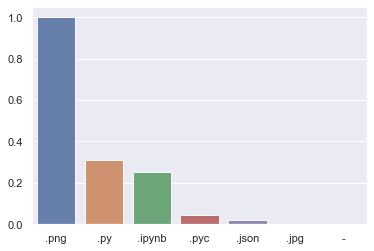

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
a_scaler = min_max_scaler
pred_rescaled = a_scaler.fit_transform(predictor.values[:,np.newaxis]).ravel()
sns.barplot(predictor.index, pred_rescaled, alpha=0.9)

In [ ]:
tmp_df = pd.DataFrame(data=predictor.values, columns=["File Ext"], index=predictor.index)
tmp_df.plot.pie(y='File Ext', figsize=(5, 5))

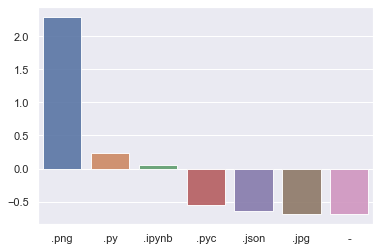

In [17]:
standard_scaler = preprocessing.StandardScaler()
a_scaler = standard_scaler
pred_rescaled = a_scaler.fit_transform(predictor.values[:,np.newaxis]).ravel()
sns.barplot(predictor.index, pred_rescaled, alpha=0.9)

In [ ]:
tmp_df = pd.DataFrame(data=predictor.values, columns=["File Ext"], index=predictor.index)
tmp_df.plot.pie(y='File Ext', figsize=(5, 5))

## References:

## Scikit-Learn:
### Objects:
    - (StandardScaler) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html